In [1]:
import pandas as pd
import parcer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

url = "https://rostov.hh.ru/search/vacancy?text=data+science&salary=&ored_clusters=true&hhtmFrom=vacancy_search_list&hhtmFromLabel=vacancy_search_line"

data = parcer.Parse_hh(url).parse_url()
data

Найденно 360 вакансий


,title,salary,city,company
0,"""Data Science"" Аналитик",None,Ташкент,Национальный банк внешнеэкономической деятельн...
1,Аналитик данных,None,Москва,ООО HeadHunter::Analytics/Data Science
2,Data Science / Machine Learning Engineer,None,Минск,ОАО Пеленг
3,Head of Data Science,None,Москва,Sape
4,Data Scientist,до 80 000 ₽ на руки,Москва,BND LLC
...,...,...,...,...
355,Администратор баз данных,None,Нижний Новгород,Сибур
356,Администратор баз данных,None,Томск,Сибур
357,Java-разработчик,None,Казань,Сибур
358,Автор онлайн курсов ИТ,100 000 – 500 000 ₽ до вычета налогов,Воронеж,ИП Прокопьева Светлана Валерьевна


In [3]:
junior_data = data[data['title'].str.contains('junior', case=False, na=False)]['title']
middle_data = data[data['title'].str.contains('middle', case=False, na=False)]['title']
senior_data = data[data['title'].str.contains('senior', case=False, na=False)]['title']
lead_data = data[data['title'].str.contains('lead', case=False, na=False)]['title']
nlp_data = data[data['title'].str.contains('nlp', case=False, na=False)]['title']
cv_data = data[data['title'].str.contains('cv', case=False, na=False)]['title']

<Axes: xlabel='grade', ylabel='count'>

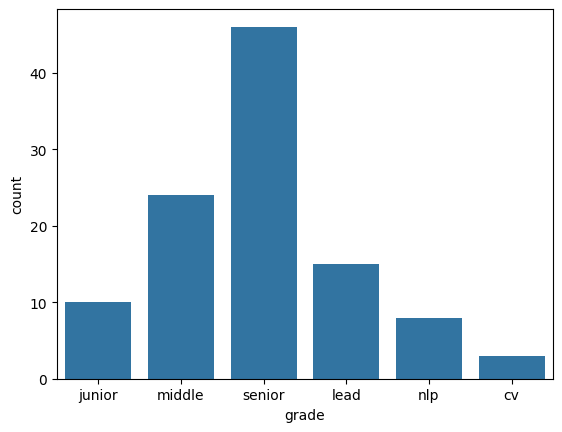

In [4]:
counts = [len(junior_data), len(middle_data), len(senior_data), len(lead_data), len(nlp_data), len(cv_data)]
plot_data = {
    "grade" : ['junior','middle', 'senior', 'lead', 'nlp', 'cv'],
    "count" : counts 
}
sns.barplot(data=plot_data, x='grade', y='count')

In [5]:
city = data['city']

<Axes: xlabel='city', ylabel='count'>

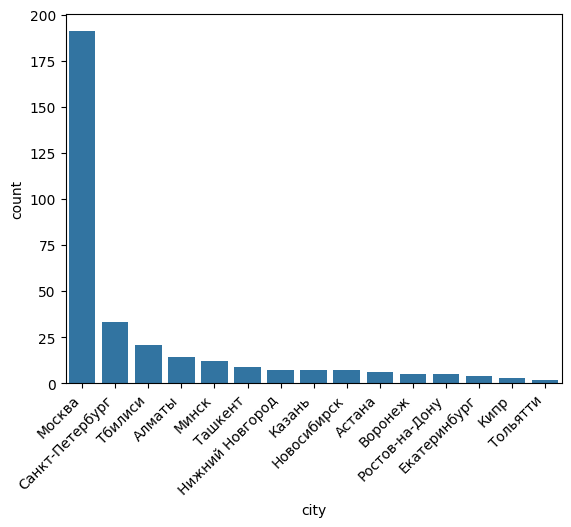

In [6]:
counts=city.value_counts()
plt.xticks(rotation=45, ha='right')
sns.barplot(counts[:15])

<Axes: xlabel='company', ylabel='count'>

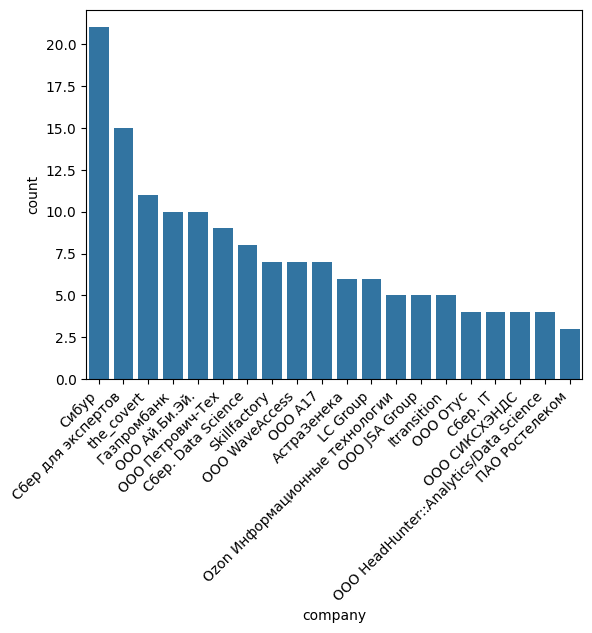

In [7]:
companies = data['company'].value_counts()
plt.xticks(rotation=45, ha='right')
sns.barplot(data=companies[:20])